# Explore CIFAR10 images with CNN machine learning

## About
- Main reference: [Stanford CS231n Learning Neural Networks for Visual Recognition](http://cs231n.github.io/)
- [Neo Xing](http://www.github.com/NeoXing) 
- MIT license, except for materials cited elsewhere
- **`...`** marks incomplete or future work

---
**Module 0 Preparation**
- AWS EC2 GPU instance
- Ipython notebook remote access

---

### Python

### Envrionment
- [AWS Education program](www.awseducate.com) EC2 g2.2xlarge GPU instance
- CS231n Ubuntu image cs231n_caffe_torch7_keras_lasagne_v2 with
    - Caffe, Torch7, Theano, Keras, Lasagne
    - CUDA, CuDNN
- [Ipython notebook remote access](http://jupyter-notebook.readthedocs.io/en/latest/public_server.html)
    1. Open IPython server + SSH + password
    2. Or local IPython server + SSH tunelling
    
- Setup
    - Install caffe on macOS is painful, anaconda configuration problems, opencv and QTKit problem, nvcc and clang incompatible problems, ...
    - Will use CS231n Ubuntu and IPython notebook instead

### Caffe tutorial

---
** Module 1 Neural Networks **

---

## Image classification
- problem definition
- challenges
- pipeline

### Data visualization
- Example image classification dataset: [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html)
- Visualizing method [t-Distributed Stochastic Neighbor Embedding (t-SNE)](http://lvdmaaten.github.io/tsne/)

#### Exploration

In [1]:
## lib and env
import numpy as np
import pandas as pd
import scipy.misc as smc
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from tsne import bh_sne
from IPython.display import Image


In [2]:
## IPython display utils
%matplotlib inline

mpl.rcParams['figure.figsize'] = 16, 12

pd.set_option('display.max_rows', 10)

from IPython.display import display, display_markdown, Markdown

def MD(string):
    display_markdown(Markdown(string))

In [12]:
## explore test data

# meta data
meta_data = unpickle(os.path.join(CIFAR10_DIR, 'batches.meta'))

# test data
test_data = unpickle(os.path.join(CIFAR10_DIR, 'test_batch'))

MD("**meta data**")
label_names = meta_data['label_names']
meta_df = pd.DataFrame(pd.Series(meta_data))
MD("label_names: " + str(label_names))
display(meta_df)

MD("**test data**")
test_data['data'] = list(test_data['data'])
test_df = pd.DataFrame(test_data)
display(test_df)

**meta data**

label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

,0
label_names,"[airplane, automobile, bird, cat, deer, dog, f..."
num_cases_per_batch,10000
num_vis,3072


**test data**

,batch_label,data,filenames,labels
0,testing batch 1 of 1,"[158, 159, 165, 166, 160, 156, 162, 159, 158, ...",domestic_cat_s_000907.png,3
1,testing batch 1 of 1,"[235, 231, 232, 232, 232, 232, 232, 232, 232, ...",hydrofoil_s_000078.png,8
2,testing batch 1 of 1,"[158, 158, 139, 132, 166, 182, 187, 193, 199, ...",sea_boat_s_001456.png,8
3,testing batch 1 of 1,"[155, 167, 176, 190, 177, 166, 168, 166, 170, ...",jetliner_s_001705.png,0
4,testing batch 1 of 1,"[65, 70, 48, 30, 23, 40, 44, 45, 45, 40, 10, 1...",green_frog_s_001658.png,6
...,...,...,...,...
9995,testing batch 1 of 1,"[76, 76, 77, 76, 75, 76, 76, 76, 76, 78, 81, 8...",cabin_cruiser_s_000783.png,8
9996,testing batch 1 of 1,"[81, 91, 98, 106, 108, 110, 80, 84, 88, 90, 92...",tabby_cat_s_000494.png,3
9997,testing batch 1 of 1,"[20, 19, 15, 15, 14, 13, 12, 11, 10, 9, 8, 8, ...",pekinese_s_002005.png,5
9998,testing batch 1 of 1,"[25, 15, 23, 17, 23, 51, 74, 91, 114, 137, 90,...",convertible_s_002525.png,1


### Visualization

**First 100 images from CIFAR 10 test data**

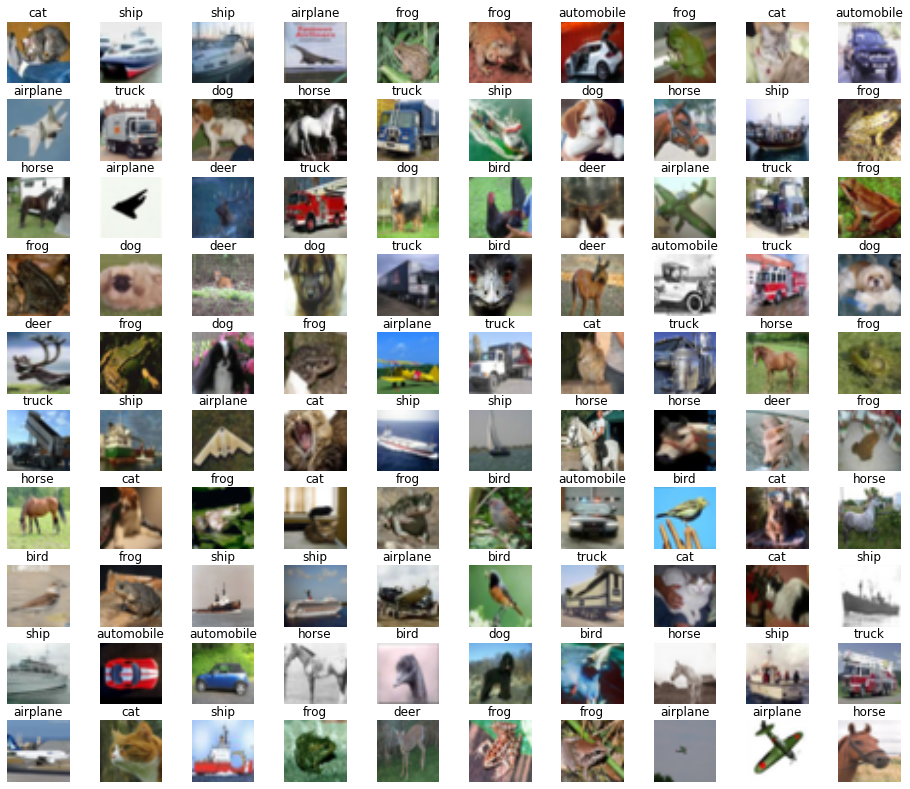

In [32]:
MD("**First 100 images from CIFAR 10 test data**")

fig, axes = plt.subplots(10, 10, 
                         figsize=(16, 16),
                         subplot_kw={'xticks': [], 'yticks': []})
plt.subplots_adjust(wspace=0.5, hspace=-0.6)
#plt.tight_layout()

for ax, i in zip(axes.flat, range(100)):
    item = test_df.iloc[i]
    img_array = np.array(item['data'])
    img = smc.toimage(img_array.reshape((3, 32, 32)))

    ax.axis('off')
    ax.set_title(label_names[item['labels']])
    ax.imshow(img)

plt.savefig('images/cifar_10_1.jpg')
plt.show()

**100 images from CIFAR 10 test data, 10 images per class**

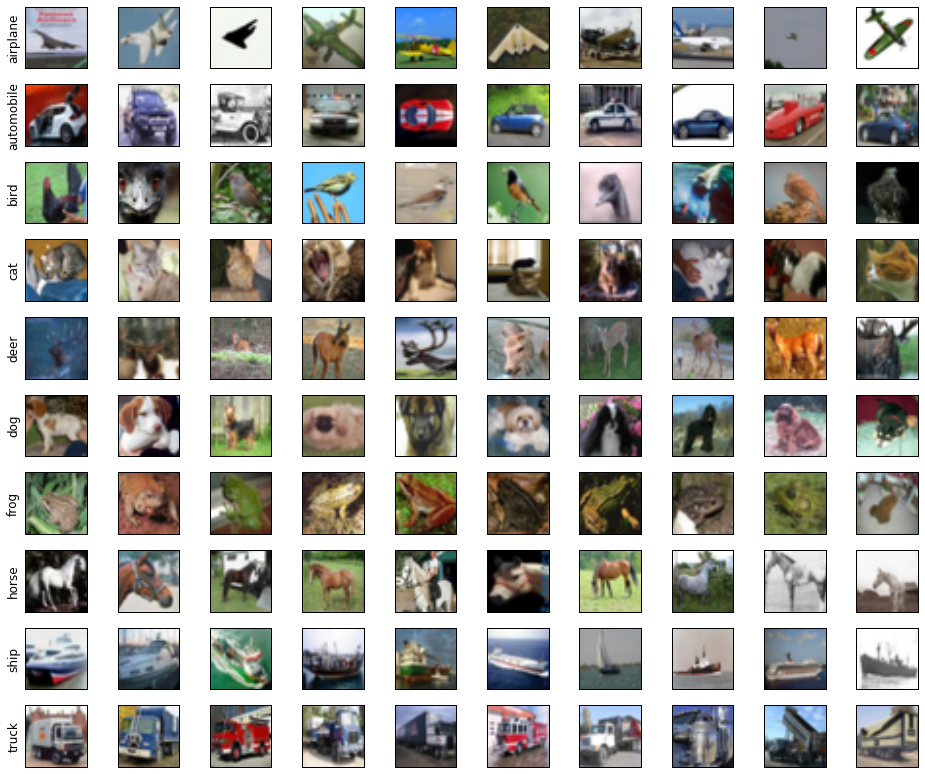

In [33]:
MD("**100 images from CIFAR 10 test data, 10 images per class**")
fig, axes = plt.subplots(10, 10, 
                         figsize=(16, 16),
                         subplot_kw={'xticks': [], 'yticks': []})
plt.subplots_adjust(wspace=0.5, hspace=-0.6)
#plt.tight_layout()
flat = axes.flat

for label in range(10):
    items = test_df[test_df['labels']==label]
    for i in range(10):
        item = items.iloc[i]
        img_array = np.array(item['data'])
        img = smc.toimage(img_array.reshape((3, 32, 32)))
        ax = flat.next()
        #ax.axis('off')
        # use ylabel of first item at each row as the row title
        if i == 0:
            ax.set_ylabel(label_names[label], size='large')
        #ax.set_title(label_names[item['labels']])
        ax.imshow(img)

plt.savefig('images/cifar_10_2.jpg')
plt.show()

### KNN

In [4]:
## load data
Xtr, Ytr, Xte, Yte, label_names = load_CIFAR10(CIFAR10_DIR)

In [8]:
print "Xtr", Xtr.shape
print "Ytr", Ytr.shape
print "Xte", Xte.shape
print "Yte", Yte.shape
print "image", Xtr[0].shape

Xtr (50000, 3072)
Ytr (50000,)
Xte (10000, 3072)
Yte (10000,)
image (3072,)


In [38]:
## test run using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
N = 100
Ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100]

accuracy = []
for K in Ks:
    knn = KNeighborsClassifier(K)
    knn.fit(Xtr, Ytr)
    score = knn.score(Xte[0:N], Yte[0:N])
    accuracy.append(score)
    
MD("**Hyper paramerters search of K**")
score_df = pd.DataFrame({'K': Ks, 'accuracy': accuracy})
display(score_df)

**Hyper paramerters search of K**

,K,accuracy
0,1,0.31
1,2,0.27
2,3,0.32
3,4,0.32
4,5,0.31
...,...,...
10,20,0.33
11,30,0.34
12,40,0.31
13,50,0.33


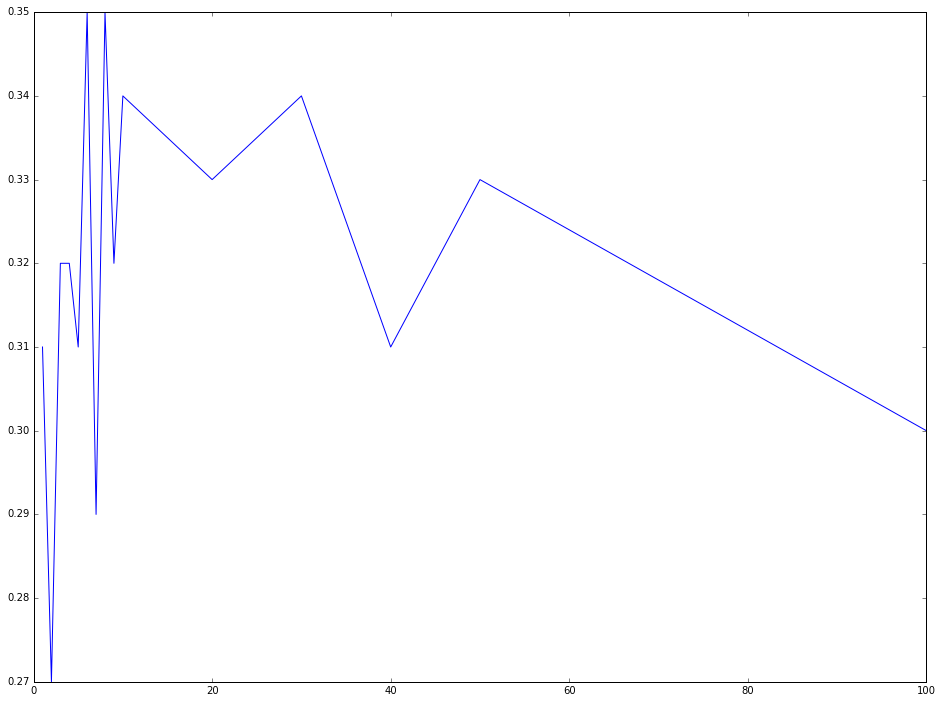

In [43]:
plt.plot(score_df['K'], score_df['accuracy'])

### t-SNE
- reference [GitHub: oduerr/dl_tutorial](https://github.com/oduerr/dl_tutorial/blob/master/tensorflow/inception_cifar10/Analyse_CIFAR-10_TSNE.ipynb)

#### Feature extraction

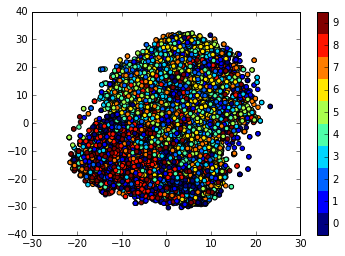

In [10]:
## feature reduction and extraction using tsne, **may take 5min **
N = 10000
vis_data = bh_sne(Xtr[:N].astype('float64'))
vis_X = vis_data[:, 0]
vis_Y = vis_data[:, 1]

# computational intensive
plt.scatter(vis_X, vis_Y, c=Ytr[:N], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

#### Feature visualization

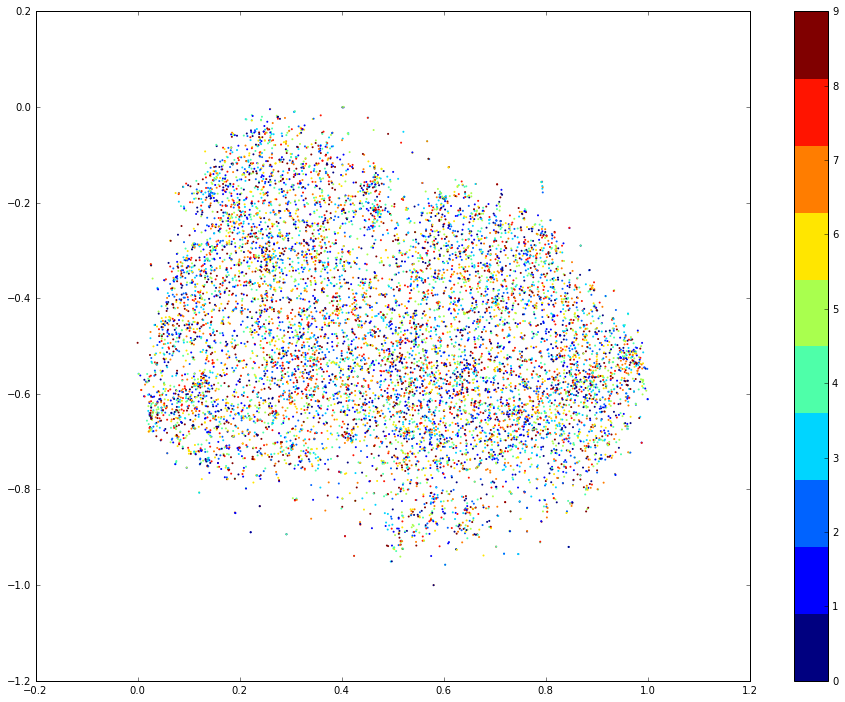

In [36]:
## nomalize data
Y = vis_data
min_1 = Y[:,0].min()
max_1 = Y[:,0].max()
min_2 = Y[:,1].min()
max_2 = Y[:,1].max()
Yn = Y[:]
Yn[:,0] = (Y[:,0] - min_1) / (max_1 - min_1) 
Yn[:,1] = (Y[:,1] - min_2) / (max_2 - min_2) 

# scatter plot of 2-D features
plt.scatter(Yn[:, 1], -Yn[:, 0], c=Yte[0:N], cmap=plt.cm.get_cmap("jet", 10), s=4, edgecolors='none')
plt.colorbar(ticks=range(10))
plt.savefig('images/cifar_tsne_1.jpg')

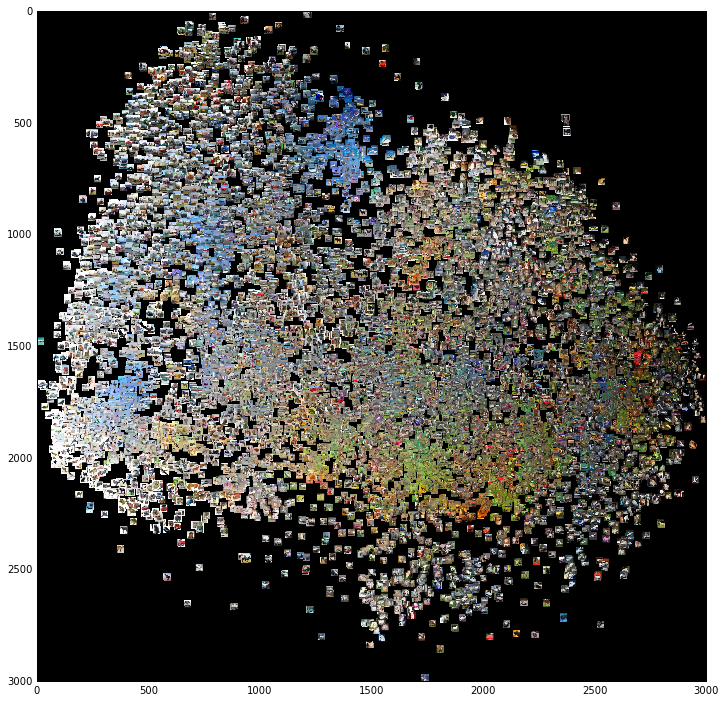

In [37]:
## plot montage of images with similar ones near each other
RES = 3000
canvas = np.zeros((RES,RES,3),dtype='uint8')
imgs = np.transpose(np.reshape(Xtr, (-1,32,32,3), order='F'), axes=(0,2,1,3))
for i in range(N):
    y_1 = int(Yn[i,0] * (RES - 32))
    y_2 = int(Yn[i,1] * (RES - 32))
    canvas[y_1:y_1+32,y_2:y_2+32,:] = imgs[i]
plt.imshow(canvas)
smc.imsave('images/cifar_tsne_2.jpg', canvas)

## Linear classification

### Liear classifier
- Parameterized mapping from images to label scores
- Linear classifier, weights and features $f(x_i, W, b) = Wx_i + b$
- Linear algebra view, matrix operation and score
- High dimensional feature spaces view

In [9]:
## example of linear classifier

# http://scikit-learn.org/stable/modules/sgd.html
# regularized linear models with stochastic gradient descent (SGD) learning
# default loss='hinge' gives a linear SVM
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(Xtr, Ytr)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [12]:
N = 1000
print clf.score(Xte[:N], Yte[:N])

# score ~0.28, similar to KNN yet much faster per testing

0.274


### Multiclass Support Vector machine
- Loss function, measures how prediction differs from ground truth (data loss)
- Regularization, preferences of parameters by penalty (regularization loss)
- The goal is to find ways to minimize the loss
- Generalization/ overfitting vs. bias/ underfitting

In [7]:
## example of support vector classifier
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
N = 10000
clf = SVC()
clf.fit(Xtr[:N], Ytr[:N])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
N = 1000
print clf.score(Xte[:N], Yte[:N])

# score ~0.1, learning process is very slow, 10min for 10000 samples

0.1


### Softmax classifier
- Multiple classes generation of binary Logistic Regression classifier
- cross-entropy loss, ...
- Information theory view, ...
- Probabilistic interpretation, ...
- Performance comparable to SVM

In [11]:
## example with softmax classifier
# loss =‘log’ gives logistic regression, a probabilistic classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log')
clf.fit(Xtr, Ytr)

N = 1000
print clf.score(Xte[:N], Yte[:N])
# score ~ 0.2

0.232


## Optimization
- Visulization of loss function of high dimensional data, ...
- Search for minimal loss, Stochastic Gradient Descent, ...
- Step size, learning rate, ...
- Gradient check, ...

## Backpropagation
- a way of computing gradients of expressions through recursive application of chain rule
- compound differential expressions with chain rule, ...
- intuitive understanding of backpropagation, ...
- staged computation, ...
- Patterns in backward flow, ...
- Gradients for vectorized operations, ...

## Neural Networks Part 1: Architecture

### Concepts
- inspiration from neural
- A single neuron can be used to implement a binary classifier (e.g. binary Softmax or binary SVM classifiers)
- Commonly used activation functions, `sigmoid`, `tanh`
- `ReLU` Rectified Linear Unit $f(x) = \max(0, x)$
- `Leaky ReLU`, fixes dying problem of ReLU
- `Maxout` $\max(f_1(x), f_2(x))$

### Architectures
- layer-wise stucutres, input, hidden, output, bias, activation function
- depth and size
- feed-forward computation, ...
- reprensentational power, the neural network can approximate any continuous function
- it is often the case that 3-layer neural networks will outperform 2-layer nets, but going even deeper (4,5,6-layer) rarely helps much more
- regularization to control the capacity of Neural Networks to prevent overfitting

## Neural Networks Part 2: Data and Loss

### Data preprocessing
- mean substraction, centers data
- nomalization
- Principal Component Analysis, whitening, not usually used in CNN
- Pitfall, only training set should be preprocessed, then applied to all data as part of the parameters of learning
- In practice, zero-center the data and normalization, PCA/Whitening are not used with Convolutional Networks

### Weight initialization
- small random numbers for source of asymmetry, with calibrated variances with 1/sqrt(n)
- sparse initialization, random connected neurons
- initializing the biases. It is possible and common to initialize the biases to be zero
- Batch Normalization, explicitly forcing the activations throughout a network to take on a unit gaussian distribution at the beginning of the training, ...
- In practice, the current recommendation is to use ReLU units and use the w = np.random.randn(n) * sqrt(2.0/n)

### Normalization
- L2 regularization is perhaps the most common form of regularization, norm each weight
- Drop out, by only keeping a neuron active with some probability pp (a hyperparameter), or setting it to zero otherwise, ...
- In practice: It is most common to use a single, global L2 regularization strength that is cross-validated. It is also common to combine this with dropout applied after all layers.

### Selection and chanllenges of loss function, ...
- ground truth classification or attribute classification

## Neural Networks Part 3: Learning and Evaluation

### Learning
#### Gradient check
- numerical tricks, ...
- dynamic computation, limited points
- Don’t let the regularization overwhelm the data
- Remember to turn off dropout/augmentations
- Check only few dimensions. In practice the gradients can have sizes of million parameters. In these cases it is only practical to check some of the dimensions of the gradient and assume that the others are correct.

#### Monitor the learning
- loss function per epoch (whole data sets as a batch), depends on learning rate
- validation/training accuracy, overfitting and underfitting
- ratio of the update magnitudes to the value magnitudes
- Activation / Gradient distributions per layer
- First-layer features visualizations

#### Parameter updates
##### SGD
- vanilla update $x += -\lambda *dx$ 
- momentum update, adding a damp, ... 
- Nesterov Momentum, ...

##### Annealing the learning rate
- anneal the learning rate over time, large parameter vectors variance vs. local minimum
- Step decay: Reduce the learning rate by some factor every few epochs
- Exponential decay. has the mathematical form $α=α_0 e^{-kt}$, where $α_0, k$ are hyperparameters and tt is the iteration number
- 1/t decay has the mathematical form $α=α_0/(1+kt)$ where $a_0,k$ are hyperparameters and tt is the iteration number
- In practice, we find that the step decay dropout is slightly preferable because the hyperparameters it involves

##### Second order methods
- Newton's method, very costly process in both space and time
- quasi-Newton methods, L-BFGS
- In practice, SGD variants based on (Nesterov’s) momentum are more standard because they are simpler and scale more easily.

##### Per-parameter adaptive learning rate methods
- adaptive adjusting that avoid manipulating laearning rate gloablly and equally for all parameters
- Adagrad, ...
- RMSprop, ...
- Adam, ...

#### Hyperparameter optimization
##### common hyperparameters
- the initial learning rate
- learning rate decay schedule (such as the decay constant)
- regularization strength (L2 penalty, dropout strength)

##### implementation
- automatic master-worker architecture, worker continuously samples random hyperparameters and performs the optimization, master launches or kills workers across a computing cluster,
- Prefer one validation fold to cross-validation
- Hyperparameter ranges. Search for hyperparameters on log scale, consider a range of learning rate multiplied or divided by some value
- Prefer random search to grid search, ...
- Careful with best values on border, ...
- Stage your search from coarse to fine, ...
- Bayesian Hyperparameter Optimization, ...

### Evaluation
#### Model Ensembles, ...
- train multiple independent models, and at test time average their predictions
- Same model, different initializations
- Top models discovered during cross-validation
- Different checkpoints of a single model
- Running average of parameters during training

## Minimal Nerual Netowrks Case Study
- codes from [cs231n notes](http://cs231n.github.io/neural-networks-case-study/) [ipython notebook](http://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.ipynb)

### Generate data

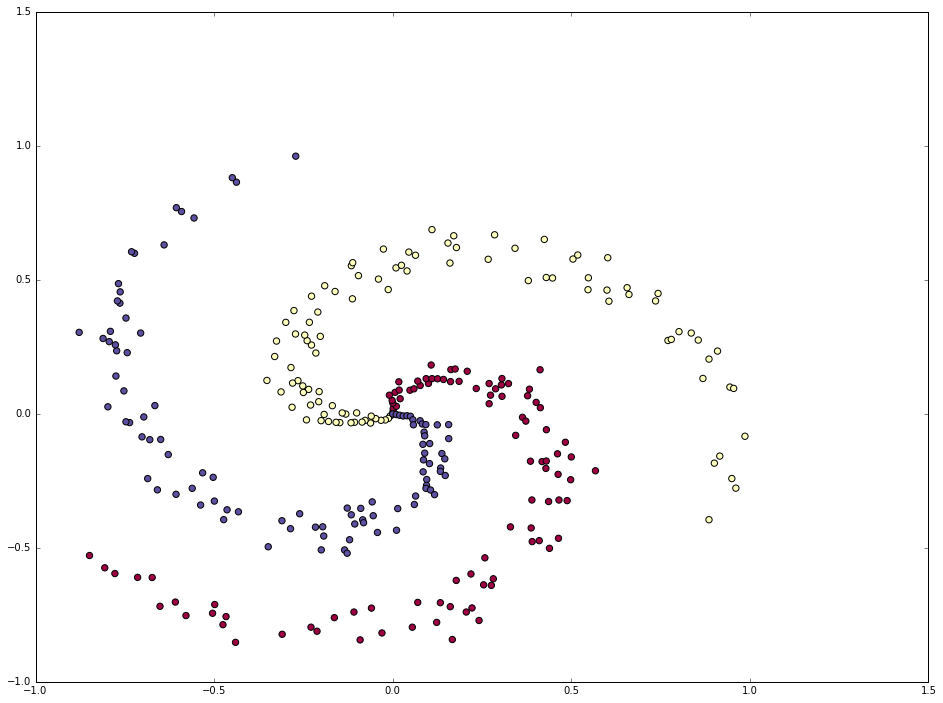

In [14]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
num_examples = N * K

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

### Training a Softmax Linear Classifier

In [49]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

## Computing the Analytic Gradient with Backpropagation
# gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.097977
iteration 10: loss 0.918779
iteration 20: loss 0.852911
iteration 30: loss 0.823620
iteration 40: loss 0.808763
iteration 50: loss 0.800537
iteration 60: loss 0.795698
iteration 70: loss 0.792724
iteration 80: loss 0.790835
iteration 90: loss 0.789606
iteration 100: loss 0.788789
iteration 110: loss 0.788239
iteration 120: loss 0.787863
iteration 130: loss 0.787603
iteration 140: loss 0.787423
iteration 150: loss 0.787297
iteration 160: loss 0.787208
iteration 170: loss 0.787145
iteration 180: loss 0.787100
iteration 190: loss 0.787069


In [50]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.49


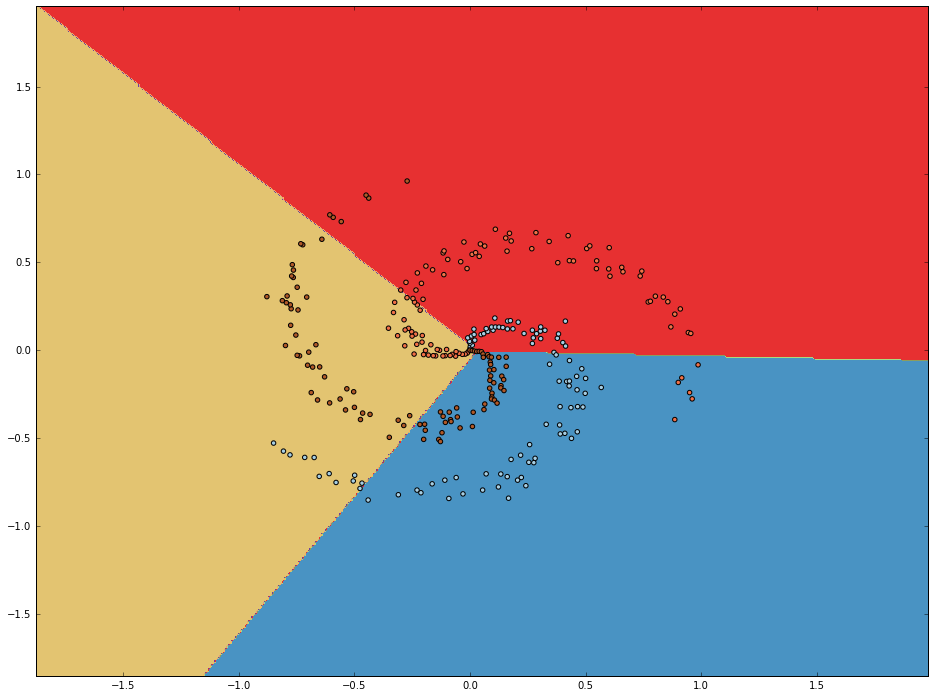

In [51]:
## plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.01 # plot step
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

scores = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(scores, axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

### Training a Neural Network Classifier

In [52]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098642
iteration 1000: loss 0.317148
iteration 2000: loss 0.288883
iteration 3000: loss 0.278189
iteration 4000: loss 0.260618
iteration 5000: loss 0.257415
iteration 6000: loss 0.256425
iteration 7000: loss 0.256327
iteration 8000: loss 0.256384
iteration 9000: loss 0.256311


In [54]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.99


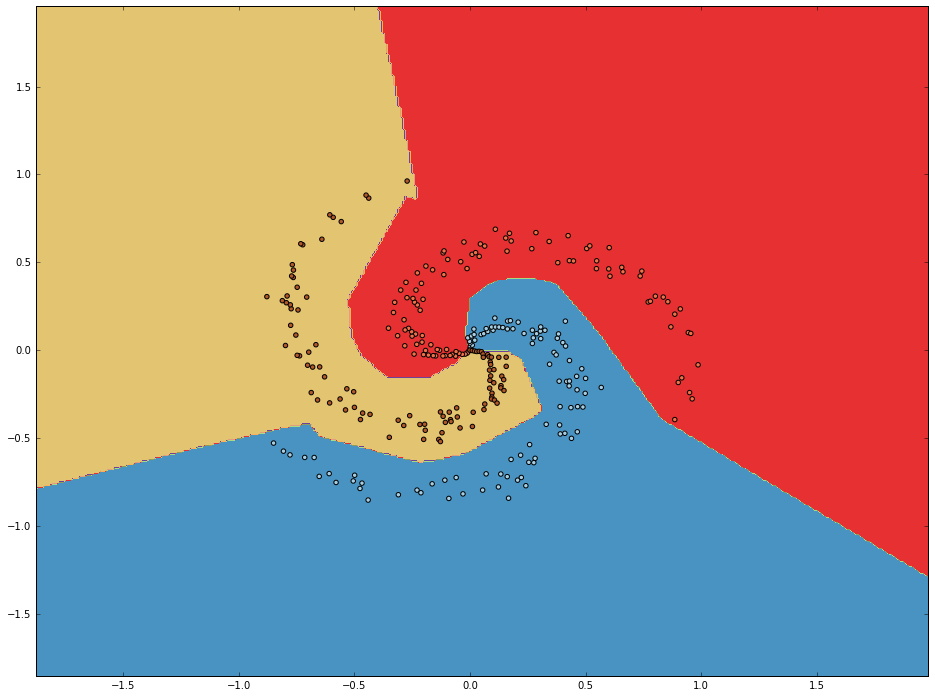

In [55]:
## plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.01 # plot step
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

hidden_layer = np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b)
scores = np.dot(hidden_layer, W2) + b2
Z = np.argmax(scores, axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

---
Module 2 Convolutional Neural Networks

---

## CNN Architectures
- reference [ConvNetJS CIFAR-10 demo](http://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)

### CNN
- similar to previous Neural Network
    - neurons that have learnable weights and biases
    - single differentiable score function
    - loss function
- make the explicit assumption that the inputs are images
- 3D volumes of neurons that transform an input 3D volume to an output 3D volume with some differentiable function that may or may not have parameters

### Layers
#### Distinct layers
- Example `[INPUT - CONV - RELU - POOL - FC]`
    - CONV/FC layers perform transformations that are a function of not only the activations in the input volume, but also of the parameters, will be trained with SGD methods
    - RELU/POOL layers will implement a fixed function
    - Each Layer may or may not have parameters (e.g. CONV/FC do, RELU/POOL don’t)
    - Each Layer may or may not have additional hyperparameters (e.g. CONV/FC/POOL do, RELU doesn’t)
    
- Input layer
    - width, height, depth (R, G, B bits)
    - [32 x 32 x 3]

- Convolutional layer
    - compute a dot product between their weights and a small local region they are connected to in the input volume
    - [32 x 32 x 12] if there are 12 filters

- RELU layer
    - apply an elementwise activation function
    - [32 x 32 x 12] size unchanged 

- Pooling layer
    - perform a downsampling operation along the spatial dimensions (width, height)
    - resulting in volume such as [16x16x12]

- Fully-connected layer
    - exactly as seen in regular Neural Networks, each neuron in this layer will be connected to all the numbers in the previous volume
    - compute the class scores, resulting in volume of size [1x1x10]

#### Convolutional Layer
##### Intuition without neurals
- CONV layer’s parameters consist of a set of learnable filters
- Every filter is small spatially (along width and height), but extends through the full depth of the input volume
- During the forward pass, we slide each filter across the width and height of the input volume and compute dot products between the entries of the filter and the input at any position
- the network will learn filters that activate when they see some type of visual feature such as an edge of some orientation or a blotch of some color on the first layer

##### The brain view
- every entry in the 3D output volume can also be interpreted as an output of a neuron that looks at only a small region in the input and shares parameters with all neurons to the left and right spatially

##### Local connectivity
- We will connect each neuron to only a local region of the input volume.
- The spatial extent of this connectivity is a hyperparameter called the receptive field of the neuron (equivalently this is the filter size).
- Receptive filter size $F$
- Example 1. For example, suppose that the input volume has size [32x32x3], (e.g. an RGB CIFAR-10 image). If the receptive field (or the filter size) is 5x5, then each neuron in the Conv Layer will have weights to a [5x5x3] region in the input volume, for a total of 5*5*3 = 75 weights (and +1 bias parameter).

##### Spatial arrangement
- Three hyperparameters control the size of the output volume: the depth, stride and zero-padding
- Depth $K$
    - corresponds to the number of filters we would like to use
    - a set of neurons that are all looking at the same region of the input as a depth column
- Stride $S$
    - the stride with which we slide the filter
    - stride 1 means to move the filters one pixel at a time
- Zero-padding $P$
    - pad the input volume with zeros around the border
    - allowss to control the spatial size of the output volumes
- Constraints on strides
    - neurons don’t “fit” neatly and symmetrically across the input
    - $(W-F+2P)/S + 1$ must be exact integer

##### Parameter sharing
- to control the number of parameters
- constrain the neurons in each depth slice to use the same weights and bias
- refer to the sets of weights as a filter (or a kernel), that is convolved with the input

##### Example
- The Krizhevsky et al. architecture that won the ImageNet challenge in 2012 
    - image size [227x227x3]
    - F = 11, S = 4, P = 0, K = 96
    - - Filter size [11x11x3]
- Conv layer [55x55x96]
- Number of parameters 55x55 + 1

##### Backpropagation
- The backward pass for a convolution operation (for both the data and the weights) is also a convolution (but with spatially-flipped filters).



#### Pooling Layer
##### Usage
- progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting
- hyperparameters
    - spatial extent $F$
    - stride $S$
- input $[W_1 * H_1 * D_1]$
- output $[W_2 * H_2 * D_2]$
    - $W_2 = (W_1 -F)/S + 1$
    - $D_2 = D_1$

#### Backpropagation
- during the forward pass of a pooling layer it is common to keep track of the index of the max activation (sometimes also called the switches) so that gradient routing is efficient during backpropagation

##### General pooling
- Average pooling, L2-norm pooling, ...


#### Fully-connected layer
- Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks.

##### Converting FC layers to CONV layers
- Conv layer is a special FC layer with sparse spots except for the filter zone
- FC layer is a Conv layer with $P = 0, S = 1, K = D_1, F = W_1$
- The ability to convert an FC layer to a CONV layer is particularly useful in practice, ...
- An IPython Notebook on [Net Surgery](https://github.com/BVLC/caffe/blob/master/examples/net_surgery.ipynb) shows how to perform the conversion in practice, in code (using Caffe)

### ConvNet Architectures

#### Layer Patterns
- `INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC`
- where the `*` indicates repetition, and the `POOL?` indicates an optional pooling layer. 
- `N >= 0` (and usually `N <= 3`), `M >= 0`, `K >= 0` (and usually `K < 3`)
- Examples
    - `INPUT -> FC`, implements a linear classifier. Here N = M = K = 0.
    - `INPUT -> CONV -> RELU -> FC`
    - `INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC`
    - `INPUT -> [CONV -> RELU -> CONV -> RELU -> POOL]*3 -> [FC -> RELU]*2 -> FC`, generally a good idea for larger and deeper networks, because multiple stacked CONV layers can develop more complex features of the input volume before the destructive pooling operation.

#### Layer Sizing Patterns
- The input layer (that contains the image) should be divisible by 2 many times.
- The conv layers should be using small filters (e.g. 3x3 or at most 5x5), using a stride of S=1S=1, and crucially, padding the input volume with zeros in such way that the conv layer does not alter the spatial dimensions of the input.
- The pool layers are in charge of downsampling the spatial dimensions of the input. The most common setting is to use max-pooling with 2x2 receptive fields (i.e. F=2F=2), and with a stride of 2 (i.e. S=2S=2).
- Why use stride of 1 in CONV? Smaller strides work better in practice. 
- Compromising based on memory constraints. In practice, people prefer to make the compromise at only the first CONV layer of the network.

#### Case studies
- LeNet. The first successful applications of Convolutional Networks were developed by Yann LeCun in 1990’s.

- AlexNet. The first work that popularized Convolutional Networks in Computer Vision was the AlexNet, developed by Alex Krizhevsky, Ilya Sutskever and Geoff Hinton. It had a similar architecture to LeNet, but was deeper, bigger, and featured Convolutional Layers stacked on top of each other.

- ZF Net. The ILSVRC 2013 winner was a Convolutional Network from Matthew Zeiler and Rob Fergus. It was an improvement on AlexNet by tweaking the architecture hyperparameters, in particular by expanding the size of the middle convolutional layers and making the stride and filter size on the first layer smaller.

- GoogLeNet. The ILSVRC 2014 winner was a Convolutional Network from Szegedy et al. from Google. Its main contribution was the development of an Inception Module that dramatically reduced the number of parameters in the network (4M, compared to AlexNet with 60M). 

- VGGNet. The runner-up in ILSVRC 2014 was the network from Karen Simonyan and Andrew Zisserman that became known as the VGGNet. Its main contribution was in showing that the depth of the network is a critical component for good performance. A downside of the VGGNet is that it is more expensive to evaluate and uses a lot more memory and parameters (140M). Most of these parameters are in the first fully connected layer, and it was since found that these FC layers can be removed with no performance downgrade, significantly reducing the number of necessary parameters.

- ResNet. Residual Network developed by Kaiming He et al. was the winner of ILSVRC 2015. It features special skip connections and a heavy use of batch normalization. The architecture is also missing fully connected layers at the end of the network.

#### VGGNet in detail, ...
- The largest bottleneck to be aware of when constructing ConvNet architectures is the memory bottleneck.

#### Computation considerations
- There are three major sources of memory to keep track of:
    - From the intermediate volume sizes: These are the raw number of activations at every layer of the ConvNet, and also their gradients (of equal size).
    - From the parameter sizes: These are the numbers that hold the network parameters, their gradients during backpropagation, and commonly also a step cache if the optimization is using momentum, Adagrad, or RMSProp.
    - Every ConvNet implementation has to maintain miscellaneous memory, such as the image data batches, perhaps their augmented versions, etc.
- If your network doesn’t fit, a common heuristic to “make it fit” is to decrease the batch size, since most of the memory is usually consumed by the activations.

## Visualizing CNN, ...

### Visualizing the activations and first-layer weights
#### Layer activations
- For ReLU networks, the activations usually start out looking relatively blobby and dense, but as the training progresses the activations usually become more sparse and localized
- some activation maps may be all zero for many different inputs, which can indicate dead filters, and can be a symptom of high learning rates

#### Conv/FC filters
- The weights are useful to visualize because well-trained networks usually display nice and smooth filters without any noisy patterns. 
- Noisy patterns can be an indicator of a network that hasn’t been trained for long enough, or possibly a very low regularization strength that may have led to overfitting.

#### Retrieving images that maximally activate a neuron, ...

#### Embedding the codes with t-SNE
- To produce an embedding, we can take a set of images and use the ConvNet to extract the CNN codes (e.g. in AlexNet the 4096-dimensional vector right before the classifier, and crucially, including the ReLU non-linearity). We can then plug these into t-SNE and get 2-dimensional vector for each image. The corresponding images can them be visualized in a grid:
- [t-SNE visualization of CNN codes](http://cs.stanford.edu/people/karpathy/cnnembed/)

#### Occluding parts of the image
- iterate over regions of the image, set a patch of the image to be all zero, and look at the probability of the class
- visualize the probability as a 2-dimensional heat map


### Visualizing the data gradient and friends, ...

## Transfer Learning and Fine-tuning CNN, ...
- it is common to pretrain a ConvNet on a very large dataset and then use the ConvNet either as an initialization or a fixed feature extractor for the task of interest
- Pretrained models [Caffe Model Zoo](https://github.com/BVLC/caffe/wiki/Model-Zoo)


### ConvNet as fixed feature extractor
- Take a ConvNet pretrained on ImageNet, remove the last fully-connected layer (this layer’s outputs are the 1000 class scores for a different task like ImageNet), then treat the rest of the ConvNet as a fixed feature extractor for the new dataset. We call these features CNN codes. 
- Once you extract the 4096-D codes for all images, train a linear classifier (e.g. Linear SVM or Softmax classifier) for the new dataset.

### Fine-tuning the ConvNet
- not only replace and retrain the classifier on top of the ConvNet on the new dataset, but to also fine-tune the weights of the pretrained network by continuing the backpropagation
- the earlier features of a ConvNet contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks, but later layers of the ConvNet becomes progressively more specific to the details of the classes contained in the original dataset

### Practical advice
#### Constraints from pretrained models
- Due to parameter sharing, you can easily run a pretrained network on images of different spatial size. This is clearly evident in the case of Conv/Pool layers because their forward function is independent of the input volume spatial size (as long as the strides “fit”).

#### Learning rates
-  It’s common to use a smaller learning rate for ConvNet weights that are being fine-tuned, in comparison to the (randomly-initialized) weights for the new linear classifier that computes the class scores of your new dataset